In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Modeling the problem

## What we need

- game simulation
    - deck of cards
        - multiple decks required
    - deal alternately to player and dealer
    - hit a hand with a card
    - points counter
        - what value is Ace
- data
    - dealer open card
    - dealer final point score
    - player original point score
    - whether player should hit
    - player final point score
    - player loses, draw, player wins
- functions and classes
    - deck
    - shuffle deck
    - deal
    - hit
    - point counter

# Generate data

## Create a deck class

- deck of 52 cards
- Ace to King for each suit
- suits don't matter in blackjack
    - let's omit them
- we want to be able to 
    - create multiple decks
    - to shuffle the deck
    - to draw a card from the deck

In [2]:
class Deck():
    """ Create a deck class """
    
    values = ["A", 2, 3, 4, 5, 6, 7, 8, 9, 10, "J", "Q", "K"] 
    def __init__(self, num_decks=1, suits=4, values=values):
        self.num_decks = num_decks
        self.deck = values * suits * self.num_decks
    
    def __str__(self):
        return "{} deck(s), {} cards left".format(self.num_decks, len(self.deck)) 
    
    def shuffle_deck(self):
        # let's shuffle the deck a random number of times from 5 to 10
        for i in range(np.random.randint(5,11)):
            np.random.shuffle(self.deck)
        
    def deal(self, hand=None):
        if hand == None:
            return self.deck.pop(0)
        else:
            hand.append(self.deck.pop(0))

In [3]:
# create a test deck
test_deck = Deck()

In [4]:
# Check the deck
print (test_deck)

1 deck(s), 52 cards left


In [5]:
# Take a look at the cards before shuffling
print (test_deck.deck)

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K', 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K', 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K', 'A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']


In [6]:
# Shuffle the cards and take another look
test_deck.shuffle_deck()
print (test_deck.deck)

['Q', 'J', 4, 7, 3, 9, 'A', 'A', 3, 'Q', 'A', 3, 'J', 2, 8, 'Q', 7, 10, 'A', 9, 7, 'J', 5, 2, 8, 2, 6, 4, 9, 'K', 9, 'K', 10, 3, 4, 6, 5, 6, 10, 8, 5, 10, 8, 'K', 7, 'K', 'Q', 'J', 4, 6, 2, 5]


In [7]:
# Deal a card
test_deck.deal()

'Q'

In [8]:
# Check what the deck looks like now
print (test_deck.deck)
print (test_deck)

['J', 4, 7, 3, 9, 'A', 'A', 3, 'Q', 'A', 3, 'J', 2, 8, 'Q', 7, 10, 'A', 9, 7, 'J', 5, 2, 8, 2, 6, 4, 9, 'K', 9, 'K', 10, 3, 4, 6, 5, 6, 10, 8, 5, 10, 8, 'K', 7, 'K', 'Q', 'J', 4, 6, 2, 5]
1 deck(s), 51 cards left


# Create a function that deals the inital two cards

In [9]:
def start_game(num_decks=8):
    # create deck
    game_deck = Deck(num_decks)
#     print (game_deck)
    
    # create hands
    dealer_hand = []
    player_hand = []
    
    # shuffle deck
    game_deck.shuffle_deck()
    
    # deal 2 cards each
    for _ in range(2):
        game_deck.deal(player_hand)
        game_deck.deal(dealer_hand)
        
    return game_deck, dealer_hand, player_hand

In [10]:
game_deck, dealer_hand, player_hand = start_game()

In [11]:
print (game_deck)

8 deck(s), 412 cards left


In [12]:
dealer_hand

['Q', 6]

In [13]:
player_hand

[8, 3]

In [14]:
game_deck.deal(player_hand)
player_hand

[8, 3, 10]

# Create a function that calculates points of a hand

In [15]:
def get_points(hand):
    
    # We want to track how the Ace was counted, if any
    # Whether it was a 1 or 11
    # So we want a tuple of (points, Ace_value)
    points = (0, 0)
    
    # replicate the original list
    cards = [i for i in hand]
    
    # If there's an Ace in the hand, take it out first
    # And count how many Aces there are
    has_A = 0
    while "A" in cards:
        has_A += 1
        cards.remove("A")
        
    # Get total points for all other cards
    try:
        if len(cards) > 0:
            for i in cards:
                try:
                    points = (points[0] + int(i), 0)
                except:
                    points = (points[0] + 10, 0)
    except:
        print (cards)
        print (type(cards))
    # Deal with the Ace if there was at least one
    
    for i in range(has_A):
        if type(points) == tuple:
            if points[0] + 11 <= 21:
                points = [(points[0] + 11, 11), (points[0] + 1, 1)]
            else:
                points = [(points[0] + 1, 1)]
        else:
            new_points = []
            for j in points:
                if j[0] + 11 <= 21:
                    new_points.extend([(j[0] + 11, 11), (j[0] + 1, 1)])
                else:
                    new_points.extend([(j[0] + 1, 1)])
            points = new_points
    
    # Now, points could be a list of tuples or a tuple
    if type(points) == list:
        # Sort the list by number of points in descending order
        points.sort(reverse=True)
        new_points = [i for i in points if i[0] <= 21]
        
        try:
            if len(new_points) == 0:
                # if there are no items in new_points
                # return the smallest item
                return points[-1]
            else:
                return new_points[0]
        except:
            print (new_points)
            print (type(new_points))
    else:
        return points # What we get back is a tuple (points, ace_value)

In [16]:
get_points(["A", "K", 9, 9])

(29, 1)

In [17]:
get_points(["A", "K"])

(21, 11)

In [18]:
get_points(["A", 9])

(20, 11)

In [19]:
get_points(["A", 6])

(17, 11)

# Create a function that simulates a full game

In [55]:
def simulate_game(strategy=0):
    game_deck, dealer_hand, player_hand = start_game()
    dealer_open, dealer_closed = dealer_hand
    player_card_one, player_card_two = player_hand
    dealer_original = get_points(dealer_hand)[0]
    player_original = get_points(player_hand)[0]
    
    # in a one player game, if either dealer or player gets blackjack
    # the game should end
    
    # Change dealer_open to numerical
    if dealer_open in ["J", "Q", "K"]:
        dealer_open = 10
    elif dealer_open == "A":
        dealer_open = get_points(dealer_hand)[1]
    
    # track how many times the player hit
    player_hit = 0
    
    # Player goes first unless dealer has blackjack
    if dealer_original != 21 and player_original != 21:
        # Player always hits 11 and below
        while get_points(player_hand)[0] <= 11:
                game_deck.deal(player_hand)
                player_hit += 1

        if strategy == 0:
            # Randomize it for the player to some extent
            while get_points(player_hand)[0] < 20:
                if np.random.random() <= 0.5:
                    game_deck.deal(player_hand)
                    player_hit += 1
                else:
                    break
        elif strategy == 1:
            # From lasvegas-how-to.com
            # Stand on a hand of 17 or more 
            # Never hit on 12, 13, 14, 15 or 16 when the dealer is showing 16 or less
            # Always split 8's
            # Double down on 11 if dealer is showing 17 or less
            if dealer_open < 7 or dealer_open==11:
                while get_points(player_hand)[0] < 12:
                    game_deck.deal(player_hand)
                    player_hit += 1
            else:
                while get_points(player_hand)[0] < 17:
                    game_deck.deal(player_hand)
                    player_hit += 1
        
    # Dealer's turn
    # if Player has busted, dealer doesn't need to play
    player_final = get_points(player_hand)[0]
    player_busts = player_final > 21
    # track how many times the dealer hits                           
    dealer_hit = 0
    if not player_busts and player_original != 21:
        

        # Check if the dealer needs to hit
        # Dealer hits below 17
        while get_points(dealer_hand)[0] < 17:
            game_deck.deal(dealer_hand)
            dealer_hit += 1

        # If dealer is at 17, check if it's a soft 17
        # if yes, hit

        if get_points(dealer_hand)[0] <= 17 and get_points(dealer_hand)[1] == 11:
            game_deck.deal(dealer_hand)
            dealer_hit += 1
    
    dealer_final = get_points(dealer_hand)[0]
    
    
    dealer_busts = dealer_final > 21
    
    
    
    player_results = 2 #let's use 2 for a draw
    
    if player_busts:
        player_results = 0
    elif dealer_busts:
        player_results = 1
    elif player_final > dealer_final:
        player_results = 1
    elif player_final < dealer_final:
        player_results = 0
#     print(game_deck)

    player_lose = 0
    player_win = 0
    
    if player_results == 0:
        player_lose = 1
    elif player_results == 1:
        player_win = 1
        
    return [dealer_open, dealer_closed, dealer_original, dealer_hit, dealer_final, int(dealer_busts), dealer_hand,
            player_card_one, player_card_two, player_original, player_hit, player_final, int(player_busts), 
            player_lose, player_win, player_hand, strategy]

In [56]:
print (simulate_game())

[4, 4, 8, 0, 8, 0, [4, 4], 9, 10, 19, 1, 26, 1, 1, 0, [9, 10, 7], 0]


In [57]:
# define a function to generate a dataframe
def gen_df(num=50000):
    ran_strat = [simulate_game() for _ in range(num)]
    rec_strat = [simulate_game(strategy=1) for _ in range(num)]
    data = []
    data.extend(ran_strat)
    data.extend(rec_strat)
    df = pd.DataFrame(data, columns=["dealer_open", "dealer_closed", 
                               "dealer_original", "dealer_hit", 
                               "dealer_final", "dealer_busts", 
                                 "dealer_hand",
                               "player_card_one", "player_card_two", 
                               "player_original", "player_hit", 
                               "player_final", "player_busts", 
                               "player_lose", "player_win", "player_hand", "rec_strategy"])
    return df

In [72]:
df = gen_df()

In [73]:
old_data = pd.read_csv("blackjack.csv")
df = pd.concat([old_data, df])

In [74]:
# Save so we can add to it next time
df.to_csv("blackjack.csv", index=False)

In [75]:
df.shape

(200000, 17)

In [76]:
df.head()

,dealer_open,dealer_closed,dealer_original,dealer_hit,dealer_final,dealer_busts,dealer_hand,player_card_one,player_card_two,player_original,player_hit,player_final,player_busts,player_lose,player_win,player_hand,rec_strategy
0,6,A,17,0,17,0,"[6, 'A']",A,J,21,0,21,0,0,1,"['A', 'J']",0
1,7,7,14,2,21,0,"[7, 7, 'A', 6]",9,8,17,0,17,0,1,0,"[9, 8]",0
2,10,K,20,0,20,0,"[10, 'K']",6,9,15,1,25,1,1,0,"[6, 9, 'Q']",0
3,7,7,14,1,24,1,"[7, 7, 'K']",7,5,12,0,12,0,0,1,"[7, 5]",0
4,11,4,15,2,24,1,"['A', 4, 'Q', 9]",7,8,15,0,15,0,0,1,"[7, 8]",0


## Checking our simulated data

In [77]:
# When player_original == 21, dealer_hit and player_hit should be zero
print (df["dealer_hit"][df.player_original == 21].value_counts())
print (df["player_hit"][df.player_original == 21].value_counts())

0    9486
Name: dealer_hit, dtype: int64
0    9486
Name: player_hit, dtype: int64


In [78]:
# When dealer_original == 21, dealer_hit and player_hit should be zero
print (df["dealer_hit"][df.dealer_original == 21].value_counts())
print (df["player_hit"][df.dealer_original == 21].value_counts())

0    9387
Name: dealer_hit, dtype: int64
0    9387
Name: player_hit, dtype: int64


In [79]:
# When player_original == 21, and dealer_original != 21
# player_win should be 1
# player_lose shoule be 0
print (df.player_win[(df.player_original == 21) & (df.dealer_original != 21)].value_counts())
print (df.player_lose[(df.player_original == 21) & (df.dealer_original != 21)].value_counts())

1    9006
Name: player_win, dtype: int64
0    9006
Name: player_lose, dtype: int64


In [83]:
# When dealer_original == 21, and player_original != 21, dealer should win
# player_win should be 0
# player_lose should be 1
print (df.player_win[(df.dealer_original == 21) & (df.player_original != 21)].value_counts())
print (df.player_lose[(df.dealer_original == 21) & (df.player_original != 21)].value_counts())

0    8907
Name: player_win, dtype: int64
1    8907
Name: player_lose, dtype: int64


In [81]:
# When dealer_final == player_final
# player_lose should be 0
# player_win should be 0
print (df.player_win[df.dealer_final == df.player_final].value_counts())
print (df.player_lose[df.dealer_final == df.player_final].value_counts())

0    14511
Name: player_win, dtype: int64
0    14511
Name: player_lose, dtype: int64


In [82]:
# When player_win == 1, player_lose == 0
# and vice versa
print (df.player_lose[df.player_win==1].value_counts())
print (df.player_win[df.player_lose==1].value_counts())

0    80258
Name: player_lose, dtype: int64
0    105231
Name: player_win, dtype: int64


# Analyze data

## Comparing strategies

In [135]:
# Define a function to generate proportion of wins and losses on random and recommended strategy
def sim_trials(num_games=100, num_trials=5000):
    # Get wins and losses
    data = []
    for i in range(num_trials):
        one_trial = gen_df(num=num_games)
        for j in range(2):
            sub = one_trial.copy()
            sub = sub[sub.rec_strategy == j]
            lose = sub["player_lose"].sum()/len(sub)
            win = sub["player_win"].sum()/len(sub)
            draw = 1 - lose - win
            data.append([lose, win, draw, j])
    return pd.DataFrame(data, columns=["lose", "win", "draw", "rec_strategy"])

In [ ]:
trials = sim_trials()

In [92]:
player_wins_df.shape

(10000, 2)

In [93]:
player_wins_df.describe()

,random,recommended
count,10000.000000,10000.000000
mean,0.417495,0.418459
std,0.048944,0.049188
min,0.230000,0.230000
25%,0.380000,0.390000
50%,0.420000,0.420000
75%,0.450000,0.450000
max,0.620000,0.600000


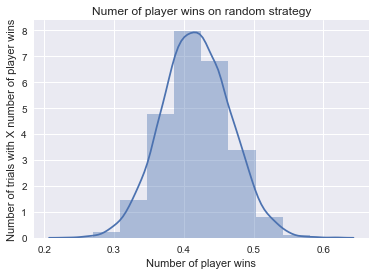

In [94]:
sns.distplot(player_wins_df["random"], bins=10);
plt.xlabel("Number of player wins");
plt.ylabel("Number of trials with X number of player wins");
plt.title("Numer of player wins on random strategy");
plt.show();

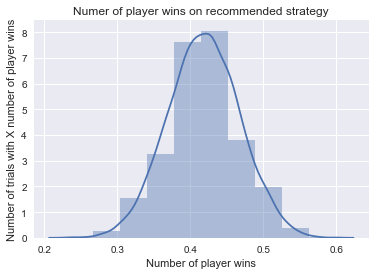

In [95]:
sns.distplot(player_wins_df["recommended"], bins=10);
plt.xlabel("Number of player wins");
plt.ylabel("Number of trials with X number of player wins");
plt.title("Numer of player wins on recommended strategy");
plt.show();

## Dealer

In [ ]:
df = pd.read_csv("black")

In [ ]:
dealer_hands = pd.pivot_table(df, index=["dealer_open", "strategy"], 
                              values=["dealer_busts", "player_wins"], aggfunc=[len, sum])
dealer_hands.reset_index(inplace=True)
dealer_hands.columns = dealer_hands.columns.values
del dealer_hands[('len', 'player_wins')]
dealer_hands.columns = ["dealer_open", "strategy","total", "dealer_busts", "player_wins"]
dealer_hands.head()

We only get to see the dealer's open card, so that's the only one we care about.

In [ ]:
dealer_open_hand = dealer_hands.copy()
dealer_open_hand["percent_dealer_busts"] = dealer_open_hand["dealer_busts"] / dealer_open_hand["total"]
dealer_open_hand["percent_player_wins"] = dealer_open_hand["player_wins"] / dealer_open_hand["total"]
dealer_open_hand

In [ ]:
sns.barplot(x="dealer_open", y="percent_dealer_busts", data=dealer_open_hand);
plt.title("Proportion of time dealer busts given dealer's open card");
plt.show();

In [ ]:
sns.barplot(x="dealer_open", y="percent_player_wins", hue="strategy", data=dealer_open_hand);
plt.title("Proportion of time player wins given dealer's open card");
plt.show();

In [ ]:
df.head()

In [ ]:
dealer_fin = pd.pivot_table(df, index=["dealer_open", "strategy"], values=["dealer_final", "player_wins"], aggfunc=[len, np.median, sum])
dealer_fin.reset_index(inplace=True)
dealer_fin.columns = dealer_fin.columns.values
del dealer_fin[("median", "player_wins")]
del dealer_fin[("sum", "dealer_final")]
del dealer_fin[("len", "dealer_final")]
dealer_fin.columns = ["dealer_open", "strategy", "total", "median_dealer_final", "sum_player_wins"]
dealer_fin["percent_player_wins"] = dealer_fin["sum_player_wins"] / dealer_fin["total"]
dealer_fin.head()

In [ ]:
sns.barplot(x="dealer_open", y="median_dealer_final", data=dealer_fin);
plt.title("Median dealer final points given dealer's open card");
plt.show();

In [ ]:
dealer_fin_p = pd.pivot_table(df, index=["dealer_final", "strategy"], values="player_wins", aggfunc=[len, sum]).reset_index()
dealer_fin_p.columns = ["dealer_final", "strategy","total", "player_wins_draws"]
dealer_fin_p["percent_player_wins_draws"] = dealer_fin_p["player_wins_draws"]/dealer_fin_p["total"]
dealer_fin_p

In [ ]:
sns.barplot(x="dealer_final", y="percent_player_wins_draws", hue="strategy", data=dealer_fin_p);
plt.title("Proportion of time player wins given dealer's final points");
plt.show();

## Player

In [ ]:
player_hands = pd.pivot_table(df, index=["player_card_one", "player_card_two", "player_original", "strategy"], 
                              values=["player_busts", "player_wins"], aggfunc=[len, sum])
player_hands.reset_index(inplace=True)
player_hands.columns = player_hands.columns.values
del player_hands[('len', 'player_wins')]
player_hands.columns = ["player_card_one", "player_card_two", "player_original", "strategy", 
                        "total", "player_busts", "player_wins"]
player_hands.head()

In [ ]:
pd.crosstab(index=df["player_final"], columns=df["strategy"], values=df["strategy"], aggfunc=len)